# Logistic Regression

Tingting Yang

INDE 577 - Data Science and Machine Learning

## Introduction

Logistic regression is an extension of the linear regression model for classification. It is often uesd to model the probabilities for classification with two possible outcomes (binary classification). Its basic concepts are also constructed in deep learning. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. 

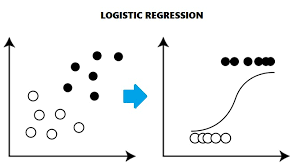

Logistic regression is a special case of linear regression. While linear regression gives a continuous output, logistic regression provides a discrete output. 

In the logistic regression, we assume that 
* Each example (x,y) belongs to one of the two complemetary classes (0 or 1);
* The examples are generated under the same distribution and independent of each other.

In the meantime, the response variables are categorical in nature, and the relationship between response variable and the predictors is not necessarily required to be linear. Because of its simplicity, logistic regression can be implemented quickly and very efficient to train.

Also, there should not be collinearity between the predictors when using logistic regression. Therefore, it would be a big task when there are many variables in the data.


### Sigmoid Function

Instead of fitting a straight line or hyperplane, the sigmoid function is used in the logistic regression.

The sigmoid function formula is
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
The shape of a sigmoid function is an "S"-shaped curve, that can take any real-valued number and map it into a value between 0 and 1.
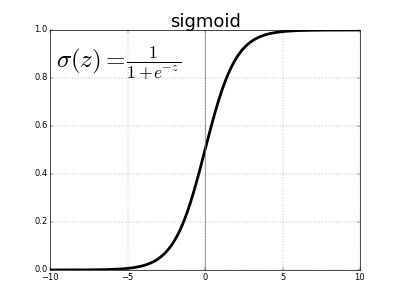

Notably, z is a linear regression model, that
$$z=w^{T}X= \sum_{i=1}^{p}w_i x_i + b$$
where p is the number of predictors and b is the bias of the model.
And thus, 
$$\sigma(z)=\sigma(\sum_{i=1}^{p}w_i x_i + b)=\frac{1}{1+e^{-(\sum_{i=1}^{p}w_i x_i + b)}}$$

For simple linear regrssion ($p=2$), 
$$z=w_1x_1+w_2x_2+b$$
$$\sigma(z)=\sigma(w_1x_1+w_2x_2+b)=\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$$
and I will use this simple model in the following mathematical derivations and examples.

### Derivations

For a simple binary classification, we can use **Bernoulli Distribution**, that
$$\mathbb{P}(y|x)= \hat y^y (1-\hat y)^{1-y}$$
And thus, when $y=1$, $\mathbb{P}(y|x)=\hat y$; when $y=0$, $\mathbb{P}(y|x)=1 - \hat y$

The estimation is done through **maximum likelihood**.

Since $\mathbb{P}(y|x)= \hat y^y (1-\hat y)^{1-y}$,
$$Log[\mathbb{P}(y|x)]=y log \hat y +(1-y)log(1-\hat y)$$
To maximize $Log[\mathbb{P}(y|x)]$, we need to minimize $-Log[\mathbb{P}(y|x)]$, which is defined as **Cross Entropy Loss (CEL)**. Then, we can use the concept of **Gradient Descent** to find the minimum of CEL.

$$L(w;y)=-ylog \sigma(z)-(1-y) log (1-\sigma(z))$$
To take the partial derivations,
$$\triangledown L[w; (x,y)]=
\begin{bmatrix}
\frac{\partial L}{\partial w_j}=(\hat y-y)x_j\\ 
\frac{\partial L}{\partial b}=\hat y-y
\end{bmatrix}$$
where $\hat y = \sigma(z)$.


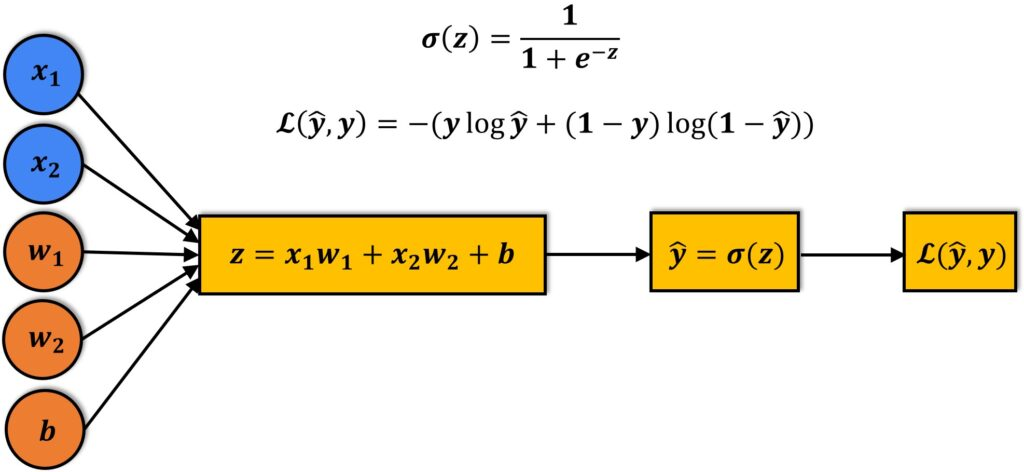


### Feature Scaling (Data Normalization)

Feature scaling is a method used to normalize the range of predictors of data, which is also called data normalization in data precessing. In some machine learning algorithm, objective functions will not work preperly without normalization if the range of the raw data varies widely, especially for classification problems. In some classification algorithm, the distance between two points is calculated by the Euclidean distance, and if one of the predictors has a wider range, the distance will occupy more proportion of the distance, and thus causing bias.

There are two main methods to sacle the features used in logistic regression.

* Scaling to unit length
    Scaling to unit length is widely used in machine learning. It is to scale the components of a feature vector such that the complete vector has length one. The general formula is 
   $$x'=\frac{x}{||x||}$$ 
   where $x$ is the original value and $x'$ is the normalized value. This means dividing each value by the Euclidean length of the vector.

* Rescaling (min-max normalization)
    Min-max normalization is the simplest method and consists in rescaling the range of features to scale the range in $[0, 1]$ or $[-1, 1]$. In logistic regression, the min-max of $[0,1]$ is often used, and the general formula is 
    $$x'=\frac{x-min(x)}{max(x)-min(x)}$$
    where $x$ is the original value and $x'$ is the normalized value.

In this notebook, I will perform both of the methods and compare the results.

### Algorithm

Let's take a simple model that $p=2$ as an example, 

* **Step 1**: Randomly select (x,y) from the training set
* **Step 2**: Feed-Forward into the Nueral Network
* **Step 3**: Update weights and bias (choose learning rate $\alpha$):
    - $$w_1 -> w_1 - \alpha (\hat y-y)x_1$$
    - $$w_2 -> w_2 - \alpha (\hat y-y)x_2$$
    - $$w_3 -> w_3 - \alpha (\hat y-y)$$
* **Step 4**: Repeat Step 1 to Step 3 until desired loss in-sample is reached, or a maximum number of steps is reached

---

## Implement

In this notebook, I will implement logistic regression using Pima Indians Diabetes Dataset.

#### Goal

Given the information about the Pima Indians, pickup 2 variables as the predictors and predict whether the person would have diabetes or not in the 5 years.

#### Pima Indians Diabetes Dataset

The [Pima Indians Diabetes Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names) involves the medical details of Pima Indians and the onset of diabetes within 5 years. There are 768 observations with 9 variables. The variables are as follows:

* Pregnant: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BP: Diastolic blood pressure (mm Hg)
* Triceps: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function
* Age: Age (years)
* Diabetes: Class variable whether the person has diabetes (marked as "1") or not (marked as "0") in the 5 years



#### Tools

In order to achieve the goal, we will need the following libraries:

* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](http://metplotlib.org)
    - Set the backend of matplotlib to the 'inline' backend ([learn more](https://ipython.readthedocs.io/en/stable/interactive/plotting.html))



In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Set the backend of matplotlib to the 'inline' backend
%matplotlib inline 

#### Define Functions 
To implement logistic regression, we need to define the following function:

* Sigmoid Function:
    The sigmoid function formula is
    $$\sigma(z)=\frac{1}{1+e^{-z}}$$


Text(0.5, 1.0, 'Sigmoid Function')

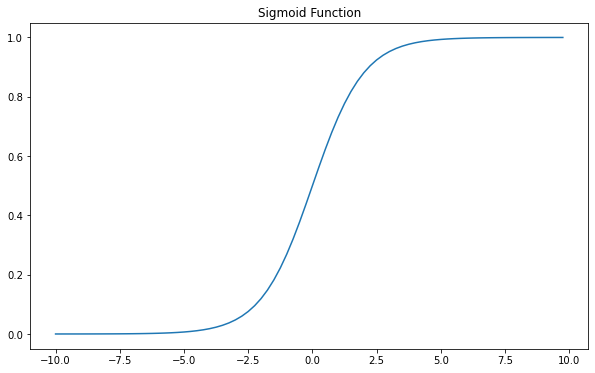

In [2]:
# Define sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Plot the curve and check the sigmoid function
domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))
plt.title("Sigmoid Function")

* Cross entropy loss (CEL): The formula of CEL is
    $$CEL = -Log[\mathbb{P}(y|x)]=-y log \hat y -(1-y)log(1-\hat y)$$

In [3]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

* The derivations of the CEL:
$$\triangledown L[w; (x,y)]=
\begin{bmatrix}
\frac{\partial L}{\partial w_j}=(\hat y-y)x_j\\ 
\frac{\partial L}{\partial b}=\hat y-y
\end{bmatrix}$$

In [4]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    else:
        dw = (y_hat - y)*x
        return dw

* Feed forward function: to feed the sigmoid function

In [5]:
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)
    else:
        return sigmoid(w @ x)

* Prediction function:

In [6]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

#### Implement on the dataset

In [7]:
# Import Pima Indians Diabetes Dataset
df = pd.read_csv('Data/pima-indians-diabetes.txt', sep=",", header=None)

# Set the names for columns
df.columns = ["Pregnant", "Glucose", "BP", "Triceps", "Insulin", "BMI", "Pedigree", "Age", "Diabetes"]

Let's explore the dataset!

In [8]:
df.head()

,Pregnant,Glucose,BP,Triceps,Insulin,BMI,Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

Plot the scatter plot to have a look at the data distribution:

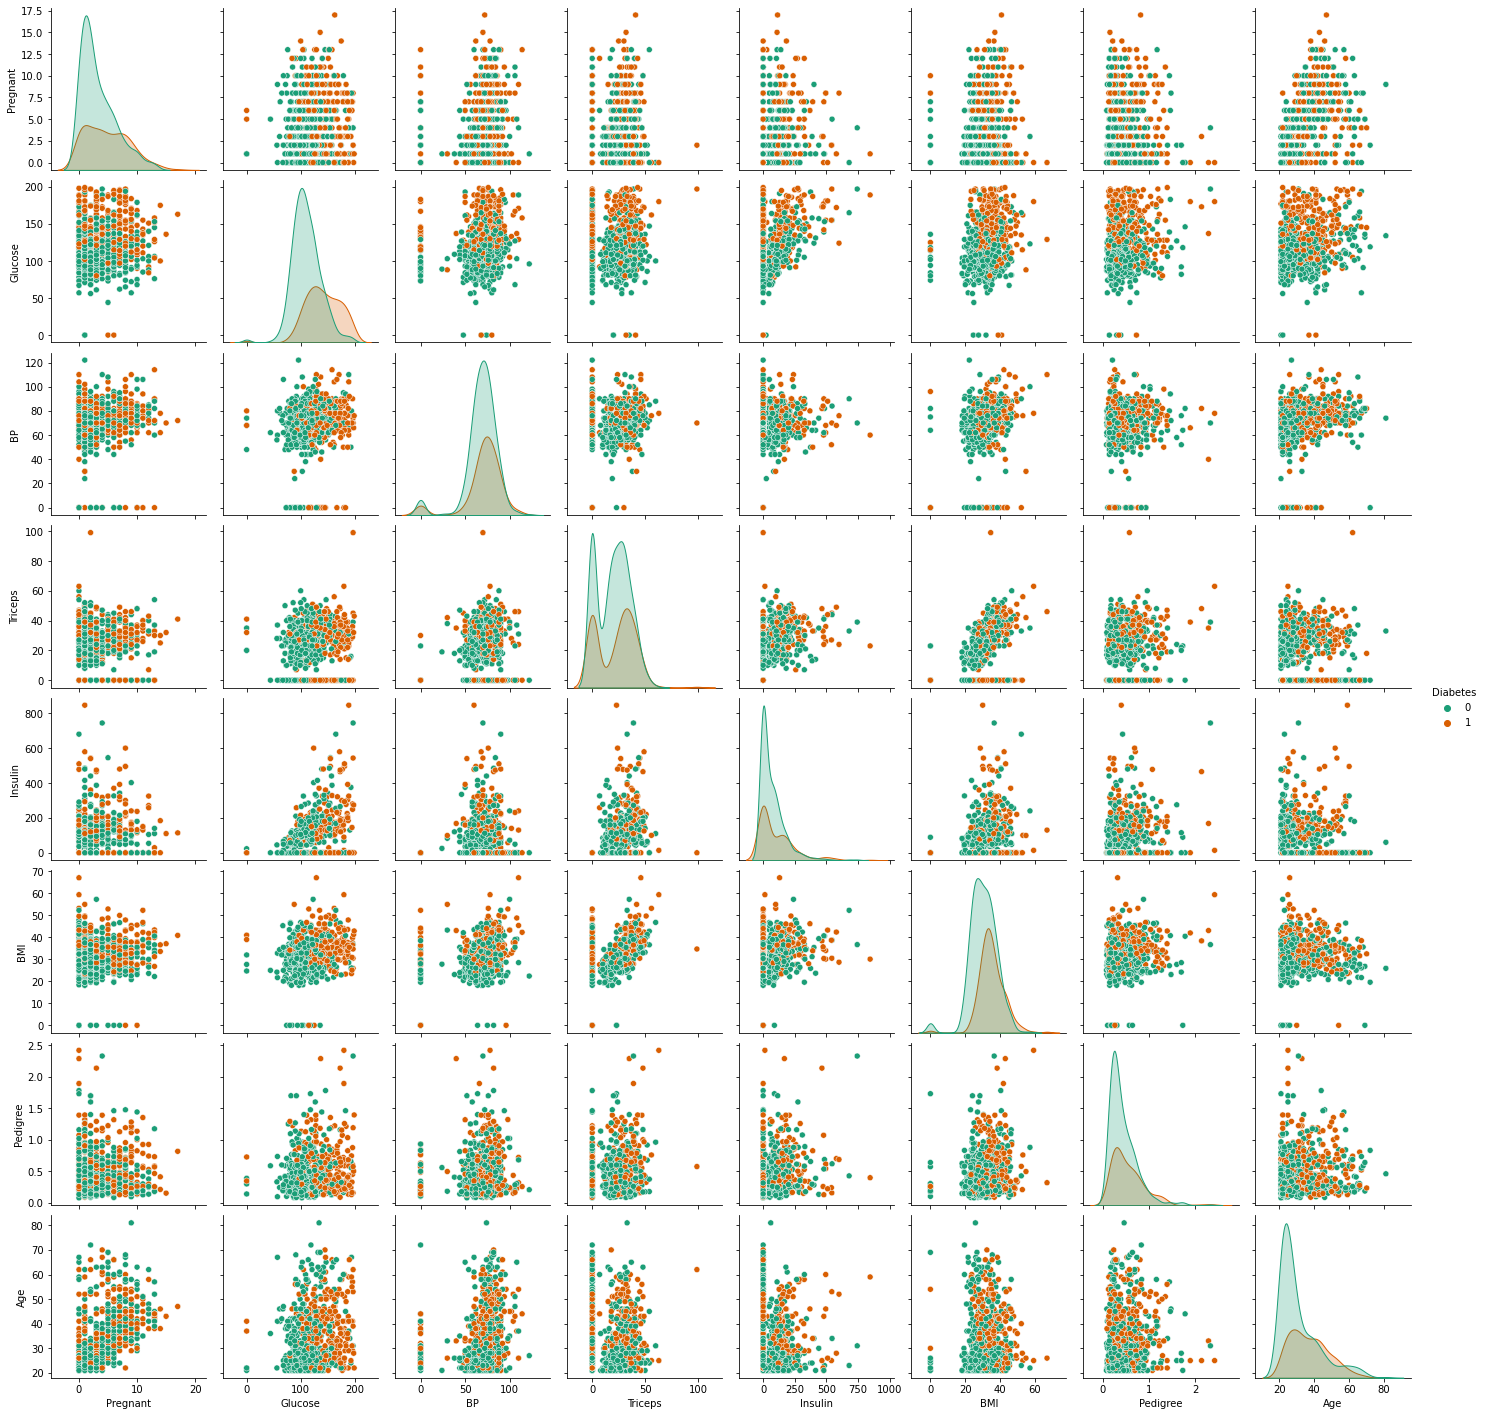

In [10]:
sns.pairplot(df, hue='Diabetes',palette='Dark2')

It seems that "Glucose" and "BMI" can seperate the class of "Diabetes" better than other pairs of variables. And thus, I will choose "Glucose" and "BMI" as the predictors to predict whether the person have diabetes.

Notably, there are some points equal to 0. 0 in both "Glucose" and "BMI" are nonsense, and they should be removed.

In [11]:
# Remove the 0s in the features 'Glucose' and 'BMI'
df = df.loc[(df[['Glucose', 'BMI']] != 0).all(axis=1)]

In [12]:
df.shape

(752, 9)

In [13]:
# Extract out desired features from candidates dataset, and covert features to numpy array
X = df[["Glucose", "BMI"]].to_numpy()

# Extract out labels, and convert labels to numpy array
Y = df["Diabetes"].to_numpy()

Text(0.5, 1.0, 'Plasma glucose concentration vs. BMI')

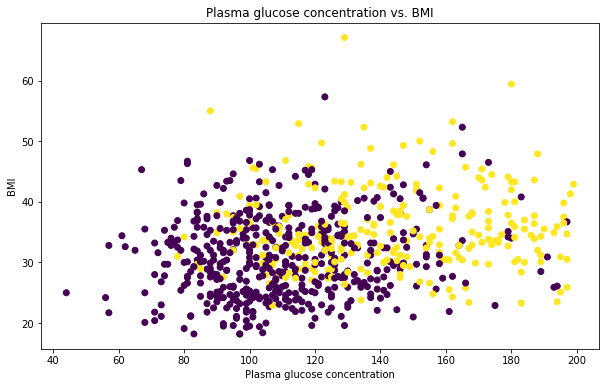

In [14]:
# Plot the scatterplot, and have an overall impression of the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("Plasma glucose concentration")
plt.ylabel("BMI")
plt.title("Plasma glucose concentration vs. BMI")

The two predictors are not in the same scale, and we need to rescale them. I will use both scaling to unit length and min-max normalization to scale the data and compare the performance of these two method.

#### Scaling to unit length 

The general formula for Scaling to unit lengthis 
$$x'=\frac{x}{||x||}$$ 
where $x$ is the original value and $x'$ is the normalized value. This means dividing each value by the Euclidean length of the vector.

In [15]:
# Use scaling to unit length to normalize the predictors
X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

Text(0.5, 1.0, 'Plasma glucose concentration vs. BMI after Scaling to Unit Length')

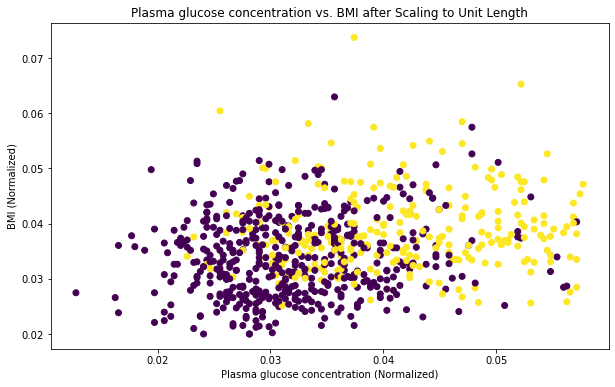

In [16]:
# Plot the scatterplot after scaling to unit length
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("BMI (Normalized)")
plt.title("Plasma glucose concentration vs. BMI after Scaling to Unit Length")

After scaling to unit length, both predictors are in the same scale in $[0,0.1]$.

Text(0, 0.5, 'Diabetes or not')

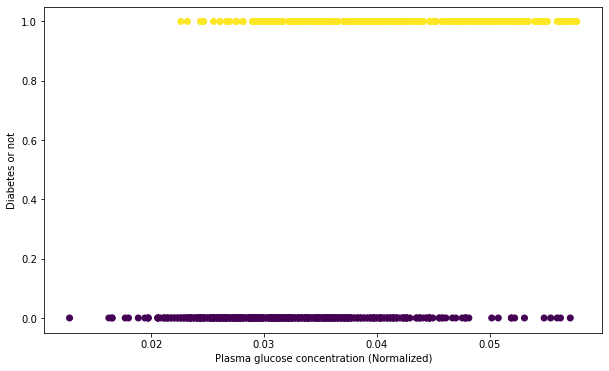

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("Diabetes or not")

Text(0, 0.5, 'Diabetes or not')

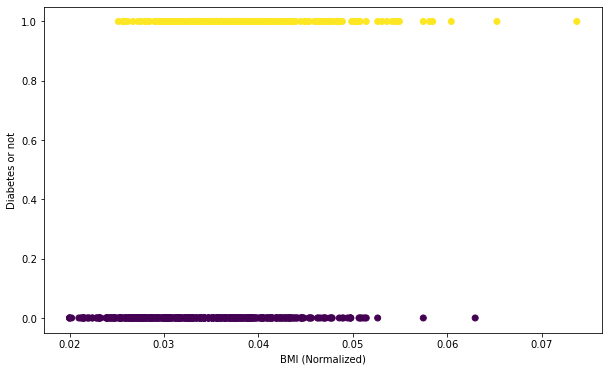

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, c = Y)
plt.xlabel("BMI (Normalized)")
plt.ylabel("Diabetes or not")

Let's implement Stochastic Gradient Descent. 

I adjusted the learning rates for several times and finaly set the learning rate at 5, and iterate for 10000 times.

In [19]:
# Randomly initial w and b
w = np.random.randn(2)
b = np.random.randn()

# Set up the learning rate
alpha = 5

# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    
    # Print the total loss every 1000 iterations
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 484.32784162355085
Total Loss at time 1001 = 464.81923410556334
Total Loss at time 2001 = 449.68650676303787
Total Loss at time 3001 = 437.2662822818666
Total Loss at time 4001 = 427.0393869521315
Total Loss at time 5001 = 418.5822361171
Total Loss at time 6001 = 411.55425789279445
Total Loss at time 7001 = 405.68372492236887
Total Loss at time 8001 = 400.75446347897224
Total Loss at time 9001 = 396.5944320909864


The algorithm works well. The total loss gradually decreases.

And then we can use our algorithm to predict, compare with the true label, and calculate the accurary of our prediction.

In [20]:
hits = 0
for x, y in zip(X, Y):
    
    # Predict using our algorithm
    y_hat = make_prediction(x, w, b)
    
    # compare whether the prediction is the same as the real label
    hits += int(y_hat == y)
    
    #print(f"Prediction: {y_hat}")
    #print(f"True label: {y}")
    #print()

# Calculate the accuracy and print it
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 62.36702127659575%


The accuracy is around 62%. The performance is not very satisfying. 

Let's try another method of normalization.

#### Min-max Normalization

The general formula for min-max normalization is 
$$x'=\frac{x-min(x)}{max(x)-min(x)}$$
where $x$ is the original value and $x'$ is the normalized value.

In [21]:
# Extract out desired features from candidates dataset, and covert features to numpy array
X = df[["Glucose", "BMI"]].to_numpy()

# Extract out labels, and convert labels to numpy array
Y = df["Diabetes"].to_numpy()

In [22]:
# Use min-max normalization to normalize the predictors
X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

Text(0.5, 1.0, 'Plasma glucose concentration vs. BMI after Min-Max Normalization')

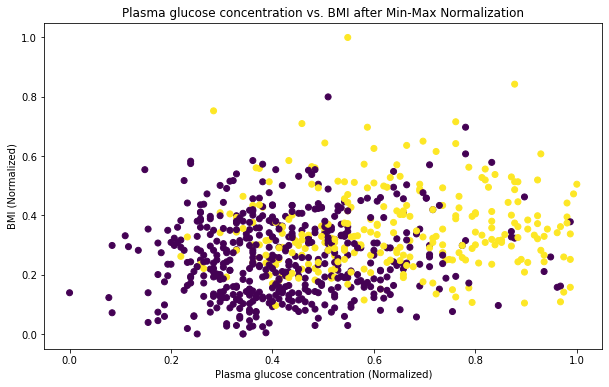

In [23]:
# Plot the scatterplot after min-max normalization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("BMI (Normalized)")
plt.title("Plasma glucose concentration vs. BMI after Min-Max Normalization")

After scaling to unit length, both predictors are in the same scale in $[0,1]$.

Text(0, 0.5, 'Diabetes or not')

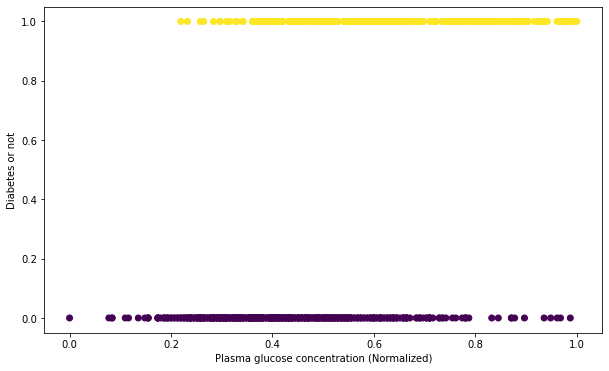

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("Diabetes or not")

Text(0, 0.5, 'Diabetes or not')

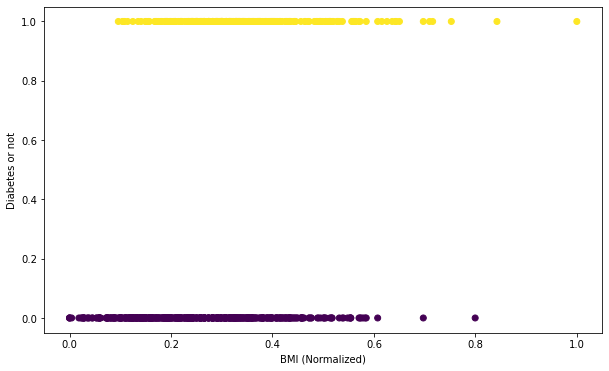

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, c = Y)
plt.xlabel("BMI (Normalized)")
plt.ylabel("Diabetes or not")

Similarly, for implement Stochastic Gradient Descent.

Here, I also tried to adjust the learning rate and finally set the learning rate at 0.5 and iterate for 10000 times.

In [26]:
# Randomly initial w and b
w = np.random.randn(2)
b = np.random.randn()

# Set up the learning rate
alpha = 0.5

# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    # Print the total loss every 1000 iterations
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 520.6791924616298
Total Loss at time 1001 = 371.3117838479119
Total Loss at time 2001 = 369.3921113908547
Total Loss at time 3001 = 369.2680206102981
Total Loss at time 4001 = 369.2577849138251
Total Loss at time 5001 = 369.2568913561915
Total Loss at time 6001 = 369.2568122189844
Total Loss at time 7001 = 369.25680518323423
Total Loss at time 8001 = 369.25680455705094
Total Loss at time 9001 = 369.2568045013042


The algorithm works well. The total loss gradually decreases, but it quicly converges to the value around 369.

And then we then also use the algorithm to predict, compare with the true label, and calculate the accurary of the prediction.

In [27]:
hits = 0
for x, y in zip(X, Y):
    
    # Predict using our algorithm
    y_hat = make_prediction(x, w, b)
    
    # compare whether the prediction is the same as the real label
    hits += int(y_hat == y)
    
    #print(f"Prediction: {y_hat}")
    #print(f"True label: {y}")
    #print()

# Calculate the accuracy and print it
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 66.88829787234043%


The accuracy is 67.0%, which is slightly better than the accuracy when using the method of scaling to unit length.

#### Conclusion

Our algorithm works well. 

Different data normalization methods affect the performance of the algorithm. In this example, min-max normalization and scaling to the unit length have similar performance, that min-max normalization works slightly better than scaling to the unit length to predict whether the person would have diabetes or not in the 5 years.
